<a href="https://colab.research.google.com/github/bayubagusbagaswara/CreditRiskPrediction/blob/master/CreditRiskPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Perusahaan Lending adalah sebuah perusahaan yang bergerak dalam bidang peminjaman uang. Dimana operasional bisnisnya sangat bergantung dengan kelancaran aliran dana (cashflow). Selama ini perusahaan merasa adanya ketidakefektifan dalam penentuan calon debitur, karena laporan keuangan mengalami kredit macet (gagal bayar). Hal ini menyebabkan perusahaan mengalami kerugian yang cukup signifikan. Data Science diharapkan mampu menganalisis data dan melakukan prediksi kedepan berdasarkan data yang telah disediakan oleh perusahaan. Data tersebut terdiri dari pinjaman yang diterima dan pinjaman yang ditolak. Pada akhirnya, perusahaan mengharapkan terknologi dapat memberikan solusi untuk masalah bisnisnya, dalam hal ini adalah memprediksi risiko kredit. Tujuannya adalah untuk mengurangi risiko gagal bayar dan meningkatkan keuntungan perusahaan itu sendiri.

# Analytic Approach

Pada kasus penentuan calon debitur yang disetujui maupun ditolak pengajuan pinjamannya sangat erat kaitannya dengan probabilitas. Oleh karena itu, dalam perancangan model machine learning kita akan menggunakan algoritma Logistic Regression dan Random Forest.

# Data Requirement

Tahap ini kita akan mulai dengan menyiapkan data dan menentukan target variable sebagai data utama pada pembuatan model machine learning nanti.

## Preparing Data

### Open Drive for File Location

File dataset kita berlokasi di drive, sehingga kita harus menyambungkan dengan drive agar bisa membaca file datasetnya.

In [1]:
# open drive for file location
from google.colab import drive
drive.mount('/content/drive')
%cd /content

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


### Import Libraries

Lakukan importing library apa saja yang akan kita butuhkan.

In [2]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 1000)

### Read Dataset

In [3]:
# read dataset
df_loan_raw = pd.read_csv('/content/drive/MyDrive/Dataset/loan_data_2007_2014.csv', low_memory=False)

### Copy Dataframe

In [4]:
# copy dataframe
df_loan_ori = df_loan_raw.copy()

### Check Info Dataframe

In [5]:
# check info dataframe
df_loan_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [6]:
# check the top 5 data
df_loan_ori.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and f

## Define Target Variable / Labeling

Dalam project credit risk modeling, tujuan utama adalah untuk melakukan prediksi terhadap suatu individu akan kemampuan mereka dalam melakukan pembayaran terhadap pinjaman/kredit yang diberikan. Oleh karena itu, variabel target yang digunakan harus mencerminkan kemampuan individu dalam hal tersebut.

Dalam dataset ini, variabel loan_status adalah variabel yang dapat dijadikan variabel target karena mencerminkan performa masing-masing individu dalam melakukan pembayaran terhadap pinjaman/kredit selama ini.

In [7]:
# check feature loan_status
df_loan_ori["loan_status"].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [8]:
# check persentase loan_status
df_loan_ori.loan_status.value_counts(normalize=True)*100

Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: loan_status, dtype: float64

Dapat dilihat bahwa variabel `loan_status` memiliki beberapa nilai:

- Current artinya pembayaran lancar.
- Charged Off artinya pembayaran macet sehingga dihapus bukukan.
- Late artinya pembayaran telat dilakukan.
- In Grace Period artinya dalam masa tenggang atau keringanan masa jatuh tempo. 
- Fully Paid artinya pembayaran lunas.
- Default artinya pembayaran macet.
- Does not meet the credit policy artinya tidak sesuai ketentuan perusahaan, meskipun kredit berhasil dibayar ataupun gagal bayar.

Dari definisi-definisi tersebut, masing-masing individu dapat ditandai apakah mereka merupakan **bad loan** (peminjam yang buruk) atau **good loan** (peminjam yang baik).

Definisi bad dan good loan terkadang bisa berbeda tergantung dari kebutuhan bisnis. Pada contoh ini, saya menggunakan keterlambatan pembayaran dan yang lebih buruk dari itu sebagai penanda bad loan. Untuk nilai `In Grace Period` kita kasih toleransi menjadi goog loan, karena mungkin debitur mampu melunasi pinjamannya saat masa tenggang. Nilai `Does not meet the credit policy. Status:Fully Paid` juga kita kasih toleransi untuk masuk dalam kategori good loan. Apabila dari sisi bisnis menyatakan bahwa kedua nilai tersebut juga berpengaruh merugikan, maka bisa dimasukkan kedalam kategori bad loan untuk kedepannya. Atau bisa dikatakan dalam menentukan status good dan bad itu berdasarkan kebijakan perusahaan. Ada perusahaan yang menerapkan aturan yang ketat, sehingga setiap pembayaran kredit yang tidak sesuai dengan perjanjian awal, maka itu dapat dikategorikan sebagai bad loan.

Good Loan:
- Current
- Fully Paid

Bad Loan:
- In Grace Period
- Late (16-30 days)
- Late (31-120 days)
- Default
- Charged Off
- Does not meet the credit policy. Status:Fully Paid
- Does not meet the credit policy. Status:Charged Off

In [9]:
df_loan = df_loan_ori.copy()

In [10]:
# changed data loan_status
good_status = ["Current", "Fully Paid"]
bad_status = [
    "In Grace Period",
    "Late (16-30 days)",
    "Late (31-120 days)",
    "Charged Off",
    "Default",
    "Does not meet the credit policy. Status:Fully Paid",
    "Does not meet the credit policy. Status:Charged Off"
]

In [11]:
# replace load status with label 1 or 0
df_loan["loan_status"] = np.where(df_loan["loan_status"].isin(bad_status), 1, 0)

In [12]:
# persentase loan for good or bad status
df_loan["loan_status"].value_counts(normalize=True)*100

0    87.707089
1    12.292911
Name: loan_status, dtype: float64

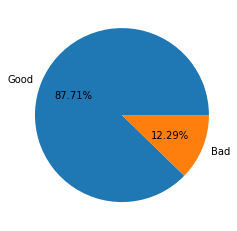

In [13]:
# create pie chart loan_status
dfg = df_loan.groupby("loan_status").agg({'id':'count'}).reset_index()
dfg.columns = ["loan_status", "total"]
dfg["%"] = round(dfg["total"]*100/sum(dfg['total']), 3)
# colors = ['#1f77b4', '#ff7f0e']
plt.pie(dfg["total"], labels=["Good", "Bad"], autopct='%.2f%%')
plt.show()

Setelah melakukan flagging terhadap bad/good loan, dapat dilihat bahwa jumlah individu yang ditandai sebagai bad loan jauh lebih sedikit daripada good loan. Hal ini menyebabkan problem ini menjadi problem `imbalanced dataset`.

# Data Collection

Pada tahap data collection ini kita akan melakukan pengumpulan data. Memilih data yang akan digunakan untuk proses analisis dan sesuai dengan data requirement.

## Separate Category Feature and Number Feature

Kita akan memisahkan feature atau kolom yang bertipe data categorical (object) dan numerical (number).

In [14]:
# pisahkan feature numerics dan categorics kedalam array
numerics = [] 
categorics = []

for i in df_loan.columns:
  if df_loan[i].dtype == 'object':
    categorics.append(i)
  else:
    numerics.append(i)

# print
print('Total Numerics = ', len(numerics))
print('--------------------------------')
print('Numerics = ', numerics)
print('--------------------------------')
print('Total Categorics = ', len(categorics))
print('--------------------------------')
print('Categorics = ', categorics)

Total Numerics =  54
--------------------------------
Numerics =  ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
--------------------------------
Total Categoric

### Statistical Summary : Categorical Features

In [15]:
# describe all features categorics
df_loan[categorics].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
pymnt_plan,466285,2,n,466276
url,466285,466285,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,1


### Statictical Summary : Numerical Features

In [16]:
df_loan[numerics].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
loan_status,466285.0,1.229291e-01,3.283562e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


## Observation Category Feature and Number Feature

- Feature `Unammed: 0` dihapus karena dia merepresentasikan nomor index dan tidak memberikan informasi apapun.
- Feature yang terlalu banyak nilai unik tidak akan kita gunakan. Seperti `id` dan `member_id` dan kedua feature tersebut tidak ada data duplikat, artinya setiap baris sudah mewakili satu individu.
- Feature yang berupa data text juga akan kita hapus, seperti feature `desc`.
- Feature `zip_code` akan kita hapus karena 3 digit angka dibelakangnya disensor.
- Feature `sub_grade` juga kita hapus karena sudah memiliki kolom yang mirip, yaitu `grade`.

## Drop Null and Unique Features


Kita akan melakukan drop (menghapus) feature yang isi datanya semua null. Tujuannya adalah untuk memudahkan proses analisis selanjutnya, karena tidak mengandung informasi yang signifikan.

In [17]:
# buat data statistik untuk mengetahui unique dan missing rate masing-masing feature
data_stat = pd.DataFrame()
data_stat.index = df_loan.columns
data_stat["unique_value"] = df_loan.nunique()
data_stat["missing_rate"] = df_loan.isna().mean()
data_stat["dtype"] = df_loan.dtypes
data_stat

,unique_value,missing_rate,dtype
Unnamed: 0,466285,0.000000,int64
id,466285,0.000000,int64
member_id,466285,0.000000,int64
loan_amnt,1352,0.000000,int64
funded_amnt,1354,0.000000,int64
funded_amnt_inv,9854,0.000000,float64
term,2,0.000000,object
int_rate,506,0.000000,float64
installment,55622,0.000000,float64
grade,7,0.000000,object


In [18]:
# kolom yang semua datanya hilang
missing_col = data_stat[data_stat["missing_rate"] == 1].index.to_list()
print("Kolom yang semua datanya hilang: ")
print(missing_col)
print()

# Kolom yang terlalu unik
varied_col = data_stat[data_stat["unique_value"] == df_loan.shape[0]].index.to_list()
print("Kolom yang terlalu unik: ")
print(varied_col)
print()

Kolom yang semua datanya hilang: 
['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

Kolom yang terlalu unik: 
['Unnamed: 0', 'id', 'member_id', 'url']



In [19]:
# Drop feature missing_col dan varied_col
df_loan.drop(columns=missing_col, inplace=True)
df_loan.drop(columns=['Unnamed: 0', 'member_id', 'url'], inplace=True)

print("Shape = ", df_loan.shape)

Shape =  (466285, 55)


In [20]:
# drop features desc, zipcode, dan sub_grade
to_drop = ['desc', 'sub_grade', 'zip_code']

df_loan.drop(columns=to_drop, inplace=True)

print("Shape = ", df_loan.shape)

Shape =  (466285, 52)


# Exploratory Data Analysis

In [21]:
# copy dulu dataframe df_loan ke data
data = df_loan.copy()
data.shape

(466285, 52)

## Separate Categorical Feature and Numerical Feature

In [22]:
# memisahkan feature numerical dengan categorical
numerics = []
categorics = []

for i in df_loan.columns:
  if data[i].dtype == 'object':
    categorics.append(i)
  else:
    numerics.append(i)

print('Total Numerics = ', len(numerics))
print('--------')
print('Feature Numerics = ', numerics)
print('--------')
print('Total Categorics = ', len(categorics))
print('--------')
print('Feature Categorics = ', categorics)

Total Numerics =  35
--------
Feature Numerics =  ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
--------
Total Categorics =  17
--------
Feature Categorics =  ['term', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type']


### Statistical Summary : Categorical Features

In [23]:
data[categorics].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
pymnt_plan,466285,2,n,466276
purpose,466285,14,debt_consolidation,274195
title,466265,63099,Debt consolidation,164075


Dapat dilihat feature yang bertipe numerik memiliki banyak jenis data. Langkah selanjutnya kita akan memodifikasi data-data tersebut.

**Observasi:**

* Untuk feature `issue_d`, `earlier_cr_line`, `last_pymnt_d`, `next_pymnt_d`, dan `last_credit_pull_d` tipe datanya dapat diubah menjadi datetime
* Label pada feature `initial_list_status` dapat diubah kedalam bentuk biner
* Label 'ANY' dan 'NONE' pada feature `home_ownership` dapat digabung dengan label 'OTHER'

### Statistical Summary : Numerical Features

In [24]:
data[numerics].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
loan_status,466285.0,1.229291e-01,3.283562e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01
delinq_2yrs,466256.0,2.846784e-01,7.973651e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+01


## Univariate Analysis : Categorical Features

In [25]:
# pisahkan category yang memiliki tipe date
to_date = []
categorics2 = []

for i in categorics:
  if data[i].nunique() > 35:
    to_date.append(i)
  else:
    categorics2.append(i)

# timpa variable categorics, karena kategori date sudah dipisah
categorics = categorics2.copy()

# print
print('Categorics = ', categorics)
print('-------------')
print('To Date = ', to_date)

Categorics =  ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status', 'application_type']
-------------
To Date =  ['emp_title', 'issue_d', 'title', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']


In [26]:
# membuat urutan pada feature emp_length
length = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
data['emp_length'] = pd.Categorical(data['emp_length'], categories=length, ordered=True)

In [27]:
# membuat urutan pada feature grade
temp = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
data['grade'] = pd.Categorical(data['grade'], categories=temp, ordered=True)

### Feature term

In [28]:
# hitung persentase feature term
term = data.groupby('term').agg({'id':'count'}).reset_index()
term.columns=['term', 'total']
term['%'] = round(term.total*100/sum(term.total),3)
term

,term,total,%
0,36 months,337953,72.478
1,60 months,128332,27.522


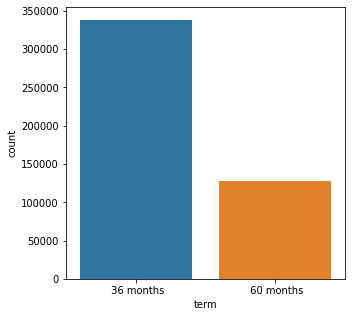

In [29]:
plt.figure(figsize=(5, 5))
sns.countplot(x=data['term'])
plt.show()

Dapat kita lihat bahwa term 36 bulan lebih diminati oleh debitur daripada term 60 bulan. Persentase term 36 bulan mencapai 72%.

### Feature grade

In [30]:
# hitung persentase feature grade
grade = data.groupby('grade').agg({'id':'count'}).reset_index()
grade.columns=['grade','total']
grade['%'] = round(grade.total*100/sum(grade.total),3)
grade

,grade,total,%
0,A,74867,16.056
1,B,136929,29.366
2,C,125293,26.870
3,D,76888,16.489
4,E,35757,7.668
5,F,13229,2.837
6,G,3322,0.712


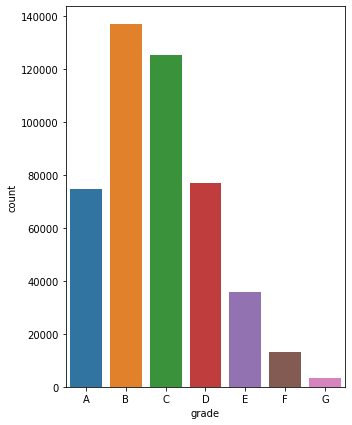

In [31]:
# plot feature grade
plt.figure(figsize=(5,7))
sns.countplot(x=data['grade'])
plt.show()

Feature `grade` didominasi oleh label B yang memiliki persentase 29%.

### Feature emp_length

In [32]:
# hitung persentase feature emp_length
emp_length = data.groupby('emp_length').agg({'id':'count'}).reset_index()
emp_length.columns = ['emp_length', 'total']
emp_length['%'] = round(emp_length.total*100/sum(emp_length.total),3)
emp_length

,emp_length,total,%
0,< 1 year,36265,8.144
1,1 year,29622,6.652
2,2 years,41373,9.292
3,3 years,36596,8.219
4,4 years,28023,6.293
5,5 years,30774,6.911
6,6 years,26112,5.864
7,7 years,26180,5.879
8,8 years,22395,5.029
9,9 years,17888,4.017


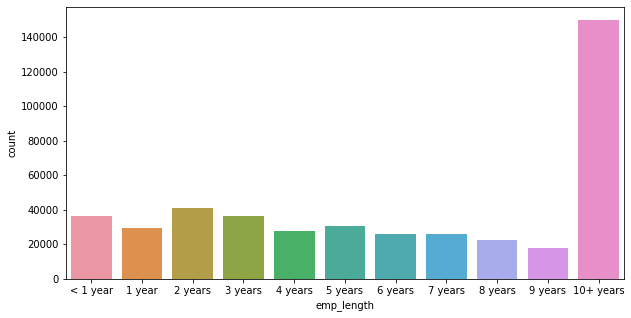

In [33]:
# plot feature emp_length
plt.figure(figsize=(10,5))
sns.countplot(x=data['emp_length'])
plt.show()

Dapat kita lihat debitur yang mengajukan pinjaman kebanyakan berstatus karyawan dengan lama bekerja lebih dari 10 tahun.

### Feature home_ownership

In [34]:
# hitung persentase feature home_ownership
home_ownership = data.groupby('home_ownership').agg({'id':'count'}).reset_index()
home_ownership.columns = ['home_ownership','total']
home_ownership['%'] = round(home_ownership.total*100/sum(home_ownership.total),3)
home_ownership=home_ownership.sort_values('%', ascending=False)
home_ownership

,home_ownership,total,%
1,MORTGAGE,235875,50.586
5,RENT,188473,40.420
4,OWN,41704,8.944
3,OTHER,182,0.039
2,NONE,50,0.011
0,ANY,1,0.000


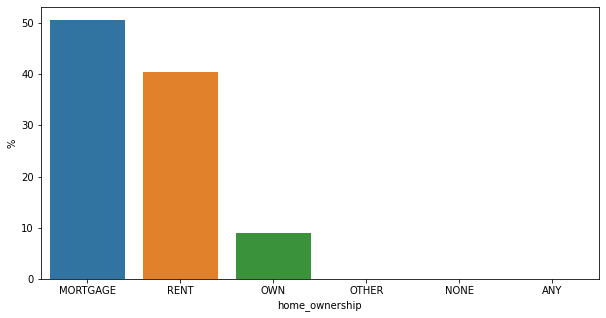

In [35]:
# plot feature home_ownership
plt.figure(figsize=(10,5))
sns.barplot(x=home_ownership['home_ownership'], y=home_ownership['%'])
plt.show()

Dapat kita lihat 50% dari total peminjam mendelegasikan benda tak bergerak sebagai jaminan pinjamannya (mortgage). Contoh dari mortgage adalah KPR, dimana peminjam bisa menempati rumahnya tetapi ia memiliki tanggungan untuk melunasisnya. Di lain sisi hanya sedikit peminjam yang memiliki rumah sendiri (own) yakni sekitar 8%. Jadi kebanyakan peminjam sebenarnya masih memiliki tanggungan pinjaman terhadap rumahnya.

### Feature pymnt_plan

In [36]:
# hitung persentase feature pymnt_plan
pymnt_plan = data.groupby('pymnt_plan').agg({'id':'count'}).reset_index()
pymnt_plan.columns = ['pymnt_plan','total']
pymnt_plan['%'] = round(pymnt_plan.total*100/sum(pymnt_plan.total),3)
pymnt_plan = pymnt_plan.sort_values('%', ascending=False)
pymnt_plan

,pymnt_plan,total,%
0,n,466276,99.998
1,y,9,0.002


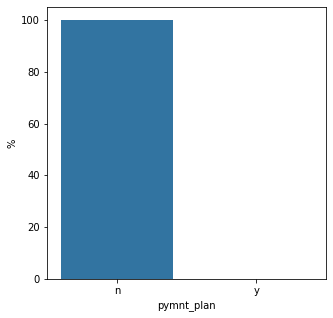

In [37]:
# plot feature pymnt_plan
plt.figure(figsize=(5,5))
sns.barplot(x=pymnt_plan['pymnt_plan'], y=pymnt_plan['%'])
plt.show()

Feature `pymnt_plan` didominasi oleh label n dengan persentase sebesar 99%, ini adalah imbalance ekstreme.

### Feature purpose

In [38]:
# hitung persentase feature purpose
purpose = data.groupby('purpose').agg({'id':'count'}).reset_index()
purpose.columns = ['purpose', 'total']
purpose['%'] = round(purpose.total*100/sum(purpose.total),3)
purpose = purpose.sort_values('%', ascending=False)
purpose

,purpose,total,%
2,debt_consolidation,274195,58.804
1,credit_card,104157,22.338
4,home_improvement,26537,5.691
9,other,23690,5.081
6,major_purchase,9828,2.108
11,small_business,7013,1.504
0,car,5397,1.157
7,medical,4602,0.987
8,moving,2994,0.642
12,vacation,2487,0.533


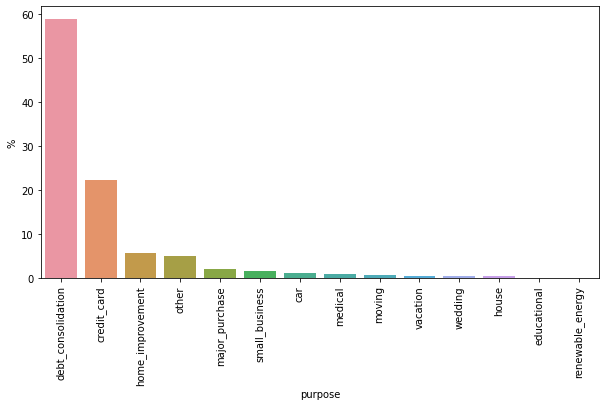

In [39]:
# plot feature purpose
plt.figure(figsize=(10,5))
sns.barplot(x=purpose['purpose'], y=purpose['%'])
plt.xticks(rotation=90)
plt.show()

Dapat kita lihat bahwa lebih dari 50% peminjam memiliki tujuan mengajukan pinjaman untuk menutup pinjaman sebelumnya. Apabila dilihat dari jenisnya, tujuan untuk konsumsi lebih banyak daripada tujuan untuk bisnis, renovasi, ataupun pendidikan.

### Feature initial_list_status

In [40]:
# hitung persentase feature initial_list_status
initial_list_status = data.groupby('initial_list_status').agg({'id':'count'}).reset_index()
initial_list_status.columns = ['initial_list_status','total']
initial_list_status['%'] = round(initial_list_status.total*100/sum(initial_list_status.total),3)
initial_list_status = initial_list_status.sort_values('%', ascending=False)
initial_list_status

,initial_list_status,total,%
0,f,303005,64.983
1,w,163280,35.017


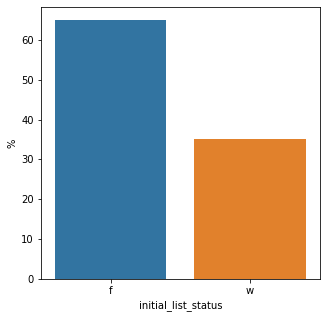

In [41]:
# plot feature initial_list_status
plt.figure(figsize=(5,5))
sns.barplot(x=initial_list_status['initial_list_status'], y=initial_list_status['%'])
plt.show()

Feature `initial_list_status` didominasi oleh lable f sebesar 60% lebih.

## Univariate Analysis : Numerical Features

In [42]:
# print feature bertipe numeric
print(numerics)
print('-------')
print(len(numerics))

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
-------
35


In [43]:
# feature id dan police_code tidak diikutsertakan, serta loan_status yang menjadi target variable
# masukkan feature numerical ke dalam variable temp
temp = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 
        'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
        'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
        'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 
        'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
        'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 
        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

### Distribution Numerical Features

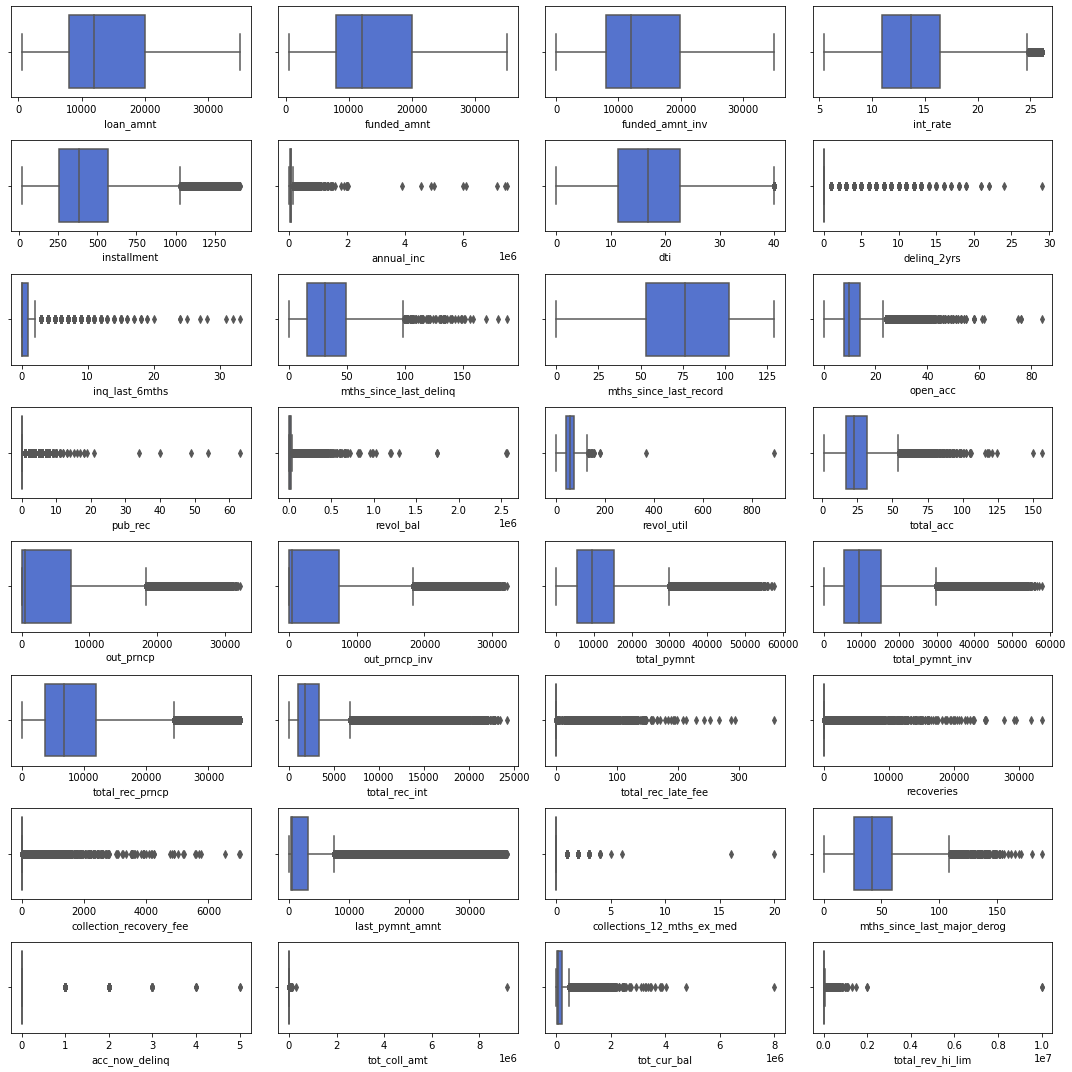

In [44]:
# plot distribusi data feature numerical
plt.figure(figsize=(15,15))
for i in range(0, len(temp)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(x=data[temp[i]], color='royalblue')
    plt.xlabel(temp[i])
    plt.tight_layout()

**Observasi:**

Feature yang tidak memiliki outliers adalah `loan_amnt`, `funded_amnt`, `funded_amnt_inv`, `dti`, `mths_since_last_record`
Feature `acc_now_delinq` merupakan data ordinal.

## Bivariate Analysis : Categorical Features

Di tahap ini kita akan menganalisis hubungan yang terjadi antara fitur bertipe categorical dengan target variable yakni `loan_status`.

In [45]:
# print data categorical
print(categorics)
print("---------")
print(len(categorics))

['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status', 'application_type']
---------
9


In [46]:
# simpan feature categorics di temp
temp = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']

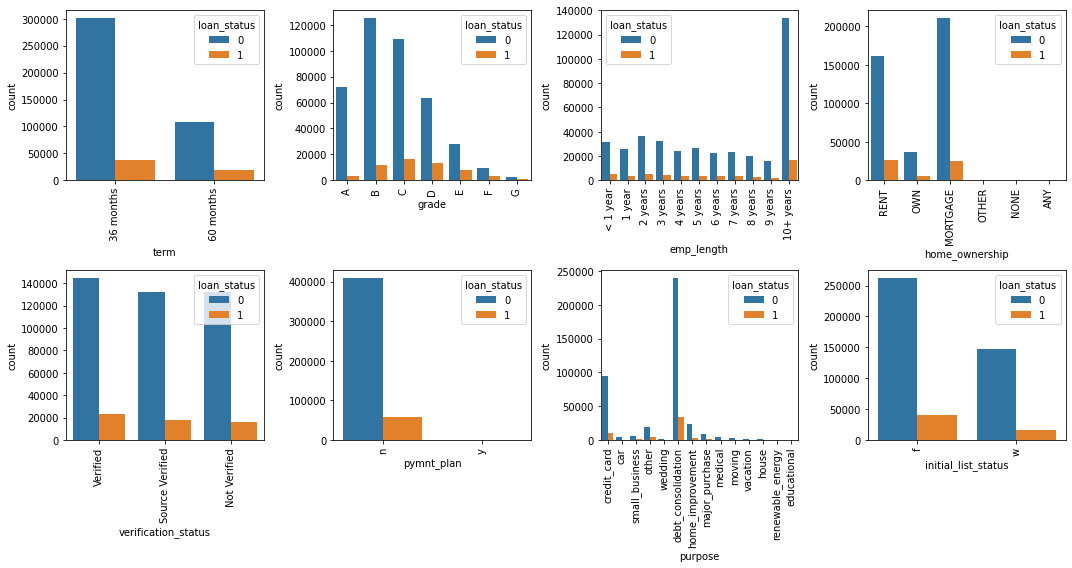

In [47]:
# plot semua data feature categorics
plt.figure(figsize=(15,8))

for i in range(0, len(temp)):
  plt.subplot(2, 4, i+1)
  sns.countplot(x=data[temp[i]], hue=data["loan_status"])
  plt.xlabel(temp[i])
  plt.xticks(rotation=90)
  plt.tight_layout()

## Bivariate Analysis : Numerical Features

Pada tahap ini kita akan coba menganalisis hubungan feature numerik dengan target variable kita yakni loan_status.

In [52]:
print(numerics)
print('------')
print('Jumlah numeric: ', len(numerics))

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
------
Jumlah numeric:  35


In [53]:
# kita tidak memasukkan id, loan_status, dan policy_code
temp = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
print(temp)
print("------")
print(len(temp))

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
------
32


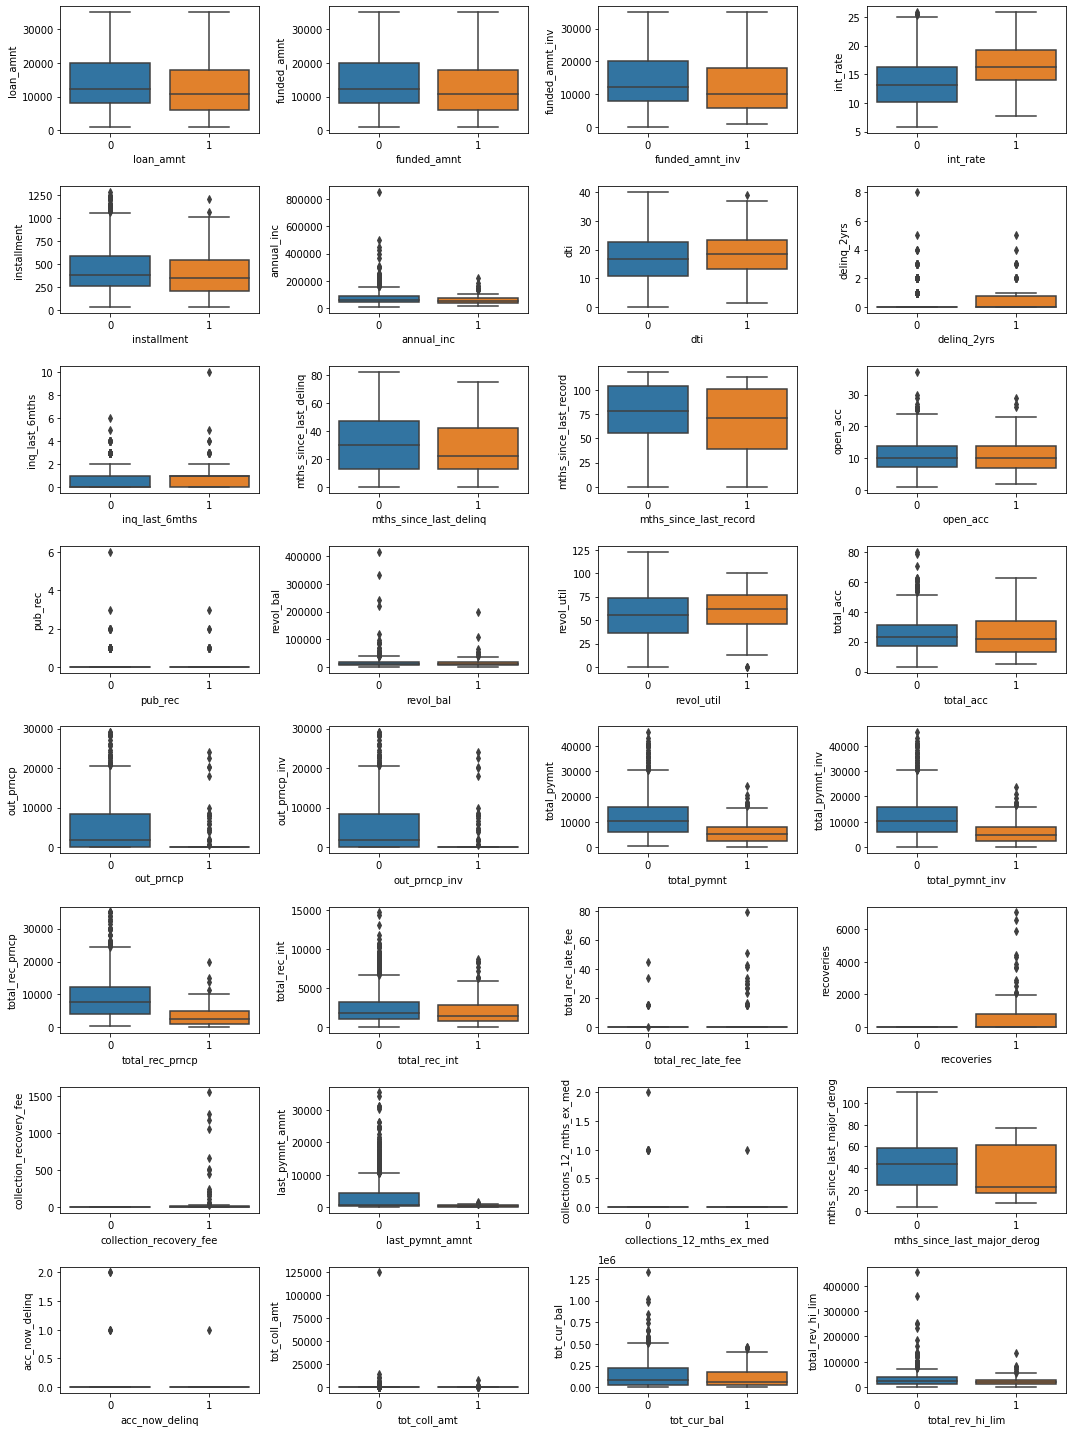

In [55]:
# plot semua data
df_sample=data.sample(1000, random_state=1)
plt.figure(figsize=(15, 20))
for i in range(0, len(temp)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(y=df_sample[temp[i]], x=data['loan_status'])
    plt.xlabel(temp[i])
    plt.tight_layout()

**Observasi:**

* Peminjam dengan nilai `total_rec_prncp` diantara 0 hingga 5000 adalah peminjam yang gagal bayar. Sedangkan peminjam dengan nilai total_rec_prncp lebih dari 5000 adalah peminjam yang mampu bayar.
* Pada feature `total_rec_int` peminjam yang mampu dan gagal bayar ada pada rentang yang sama, yaitu antara 0 hingga 5000.
* Peminjam yang gagal bayar memiliki nilai `total_rec_late_fee` yang lebih tinggi dibandingkan peminjam yang mampu bayar
* Peminjam dengan nilai `recoveries` lebih besar dari 0 merupakan peminjam yang gagal bayar. Sedangkan peminjam dengan `recoveries` sama dengan 0 merupakan peminjam yang mampu bayar.
* Peminjam dengan `collection_recovery_fee` lebih besar dari 0 adalah peminjam yang gagal bayar. Sedangkan, peminjam dengan `collection_recovery_fee` sama dengan 0 adalah peminjam yang dapat membayar.
* Pada feature `last_pymnt_amnt` peminjam yang total pembayaran terakhir (last_pymnt_amnt) kurang dari 10000 adalah peminjam yang gagal bayar.
* Peminjam dengan nilai `mnth_since_Last_major_derog` diantara 0 hingga 75 adalah peminjam yang gagal bayar.
* Peminjam dengan nilai `tot_cur_bal` diantara 0 hingga 0.5 adalah peminjam yang gagal bayar.
* Peminjam dengan nilai `total_rev_hi_lim` diantara 0 hingga 150000 adalah peminjam yang gagal bayar.

# Data Preprocessing

## Modified Data & Feature Engineering

Pada tahap ini kita akan melakukan modifikasi beberapa fitur ke dalam format yang dapat digunakan untuk modeling. Misalnya seperti format datetime. Karena pemrosesan modeling dilakukan oleh komputer, sedangkan komputer hanya bisa mengenali dalam format numerik.

### Feature emp_length

Modifikasi emp_length, dimana data sebelumnya adalah `4 years` lalu kita modifikasi menjadi `4`. 

In [48]:
# cek data emp_length unique
data['emp_length'].unique()

['10+ years', '< 1 year', '1 year', '3 years', '8 years', ..., '5 years', '6 years', '2 years', '7 years', NaN]
Length: 12
Categories (11, object): ['< 1 year' < '1 year' < '2 years' < '3 years' ... '7 years' < '8 years' <
                          '9 years' < '10+ years']

In [49]:
# modifikasi dan buat kolom baru bernama emp_length_int
# data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
# data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
# data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
# data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

In [50]:
# ubah tipe data emp_length_int menjadi float
# data['emp_length_int'] = data['emp_length_int'].astype(float)

In [51]:
# drop emp_length
# data.drop('emp_length', axis=1, inplace=True)